In [85]:
import numpy as np
import results 
import os
import argparse
from data_making.extract_data import *

In [86]:
def sample_on_plane(num_samples):
    """
    Sampling uniformly within a unit sphere
    """              
    phi = 0 # np.random.uniform(0, 2 * np.pi, size=num_samples)
    costheta = np.random.uniform(-1, 1, size=num_samples)
    u = np.random.uniform(0, 1, size=num_samples)
    theta = np.arccos(costheta)
    r = 1.1 * np.cbrt(u)    # R = 1.003 as presented in the original paper
    x = r * np.sin(theta) * np.cos( phi )
    y = r * np.sin(theta) * np.sin( phi )
    z = r * np.cos(theta)
    samples = np.vstack((x, y, z)).transpose(1, 0)
    return samples

In [101]:
def sample_on_plane():
    samples = np.array([]).reshape(0, 3)
    for x in np.arange(-1, 1, 0.05):
        for y in np.arange(-1, 1, 0.05):
            for z in np.arange(-1, 1, 0.05):
                samples = np.vstack((samples, np.array([x, y, z])))
    return samples


In [102]:
num_samples = 10000

dict_samples_sdf = dict()
# load objs_dict from results/objs_dict.npy
objs_dict = np.load(os.path.join(os.path.dirname(results.__file__), 'objs_dict.npy'), allow_pickle=True).item()
for obj_idx in list(objs_dict.keys())[1:4]:    
    dict_samples_sdf[obj_idx] = dict()
    #dict_samples_sdf[obj_idx]['samples'] = sample_on_plane(num_samples)
    dict_samples_sdf[obj_idx]['samples'] = sample_on_plane()
    sdf = compute_sdf(objs_dict[obj_idx]['verts'], objs_dict[obj_idx]['faces'], dict_samples_sdf[obj_idx]['samples'])
    dict_samples_sdf[obj_idx]['sdf'] = sdf

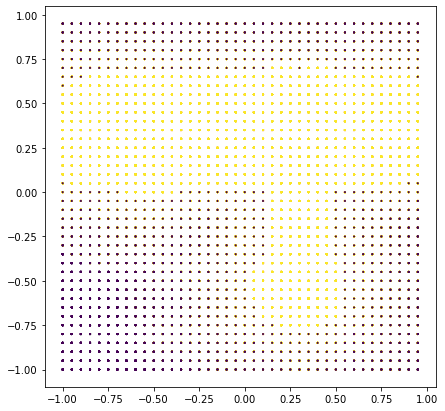

In [120]:
list_objects = list(dict_samples_sdf.keys())
idx_object = 1

x = dict_samples_sdf[list_objects[idx_object]]['samples'][:, 0]
y = dict_samples_sdf[list_objects[idx_object]]['samples'][:, 1]
color = dict_samples_sdf[list_objects[idx_object]]['sdf']
color_code = np.where(color < -0.5, -1, 1)
fig = plt.figure(figsize=(7, 7))
plt.scatter(x, y, s=1, c=color_code)
plt.show()

In [119]:
list_objects = list(dict_samples_sdf.keys())
idx_object = 1

x = dict_samples_sdf[list_objects[idx_object]]['samples'][:, 0]
y = dict_samples_sdf[list_objects[idx_object]]['samples'][:, 1]
z = dict_samples_sdf[list_objects[idx_object]]['samples'][:, 2]

sdf = dict_samples_sdf[list_objects[idx_object]]['sdf']
x_shape = x[sdf > -0.5]
y_shape = y[sdf > -0.5]
z_shape = z[sdf > -0.5]

fig = go.Figure(
    [   
        go.Scatter3d(x=x_shape, y=y_shape,z=z_shape, mode='markers',marker=dict(size=3, color='red'))
    ]
)
fig.show()